In [ ]:
# Stock Price Prediction for TCS and Infosys using ML

In [3]:
# Step 1: Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta

In [4]:
# Step 2: Download stock data from Yahoo Finance
tcs = yf.download("TCS.NS", start="2015-01-01", end="2025-01-01")
infosys = yf.download("INFY.NS", start="2015-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


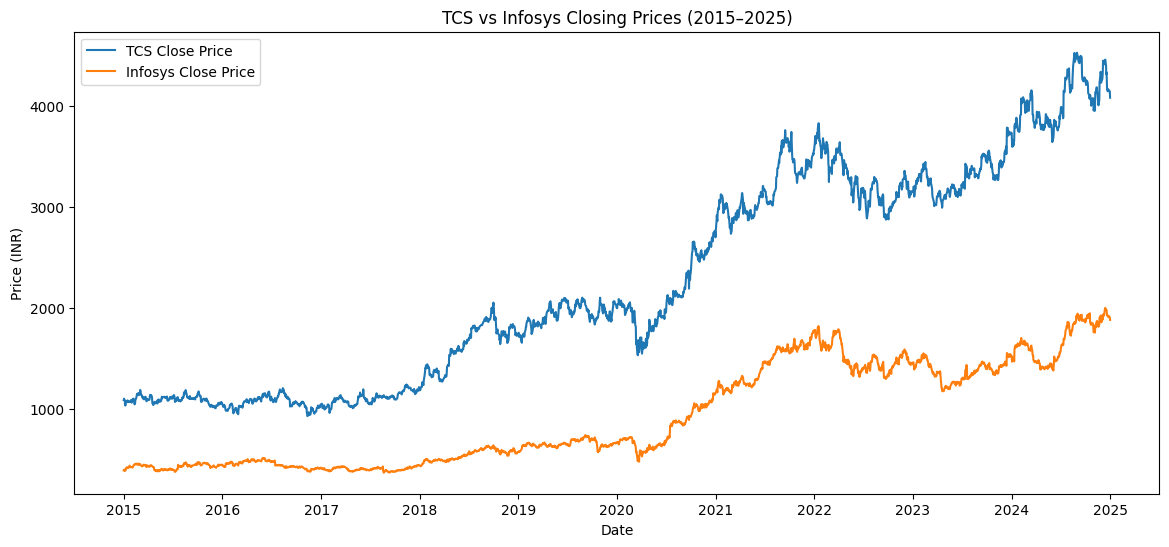

In [5]:
# Step 3: Visualize closing prices
plt.figure(figsize=(14, 6))
plt.plot(tcs['Close'], label='TCS Close Price')
plt.plot(infosys['Close'], label='Infosys Close Price')
plt.title('TCS vs Infosys Closing Prices (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [6]:
# Step 4: Create 'Prediction' column for future prices (30 days ahead)
future_days = 30

tcs_close = tcs[['Close']].copy()
tcs_close['Prediction'] = tcs_close['Close'].shift(-future_days)

infosys_close = infosys[['Close']].copy()
infosys_close['Prediction'] = infosys_close['Close'].shift(-future_days)

In [7]:
# Step 5: Drop rows with NaN values
tcs_close = tcs_close.dropna().copy()
infosys_close = infosys_close.dropna().copy()


In [8]:
# Step 6: Prepare input features (X) and target values (y)
X_tcs = np.array(tcs_close['Close']).reshape(-1, 1)
y_tcs = np.array(tcs_close['Prediction'])

X_infosys = np.array(infosys_close['Close']).reshape(-1, 1)
y_infosys = np.array(infosys_close['Prediction'])

In [9]:
# Step 7: Train models
lr_tcs = LinearRegression().fit(X_tcs, y_tcs)
rf_tcs = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_tcs, y_tcs)

lr_infosys = LinearRegression().fit(X_infosys, y_infosys)
rf_infosys = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_infosys, y_infosys)

In [11]:
# Step 8: Make predictions on training data
lr_pred_tcs = lr_tcs.predict(X_tcs)
rf_pred_tcs = rf_tcs.predict(X_tcs)

lr_pred_infosys = lr_infosys.predict(X_infosys)
rf_pred_infosys = rf_infosys.predict(X_infosys)

In [12]:
# Step 9: Evaluate with MAE and RMSE
def evaluate_model(y_true, y_pred, label="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

print("TCS:")
evaluate_model(y_tcs, lr_pred_tcs, "Linear Regression")
evaluate_model(y_tcs, rf_pred_tcs, "Random Forest")

print("\nInfosys:")
evaluate_model(y_infosys, lr_pred_infosys, "Linear Regression")
evaluate_model(y_infosys, rf_pred_infosys, "Random Forest")

TCS:
Linear Regression - MAE: 130.54, RMSE: 177.85
Random Forest - MAE: 47.19, RMSE: 68.96

Infosys:
Linear Regression - MAE: 63.64, RMSE: 92.19
Random Forest - MAE: 25.06, RMSE: 39.15


In [15]:
# Step 10: Predict future prices till 2030
future_range = 365 * 5  # approx. days till 2030

# Start from the next index number
next_day_tcs = len(tcs)
next_day_infosys = len(infosys)

# Store predictions
future_prices_tcs_lr = []
future_prices_tcs_rf = []
future_prices_infosys_lr = []
future_prices_infosys_rf = []

for i in range(future_range):
    # Predict using day index
    input_day_tcs = np.array([[next_day_tcs + i]])
    input_day_infosys = np.array([[next_day_infosys + i]])
    
    # Predict prices
    pred_lr_tcs = lr_tcs.predict(input_day_tcs)[0]
    pred_rf_tcs = rf_tcs.predict(input_day_tcs)[0]
    
    pred_lr_infosys = lr_infosys.predict(input_day_infosys)[0]
    pred_rf_infosys = rf_infosys.predict(input_day_infosys)[0]
    
    # Store results
    future_prices_tcs_lr.append(pred_lr_tcs)
    future_prices_tcs_rf.append(pred_rf_tcs)
    future_prices_infosys_lr.append(pred_lr_infosys)
    future_prices_infosys_rf.append(pred_rf_infosys)

# Create future date range
last_date = tcs.index[-1]
future_dates = [last_date + timedelta(days=i+1) for i in range(future_range)]

# Create DataFrames for plotting or analysis
future_df = pd.DataFrame({
    'Date': future_dates,
    'TCS_LR': future_prices_tcs_lr,
    'TCS_RF': future_prices_tcs_rf,
    'Infosys_LR': future_prices_infosys_lr,
    'Infosys_RF': future_prices_infosys_rf
})
future_df.set_index('Date', inplace=True)

# (Optional) Display the head of the predicted DataFrame
print(future_df.head())

                 TCS_LR       TCS_RF   Infosys_LR   Infosys_RF
Date                                                          
2025-01-01  2506.435174  2655.254485  2487.215240  1888.274305
2025-01-02  2507.435301  2655.254485  2488.216384  1888.274305
2025-01-03  2508.435429  2656.647983  2489.217527  1888.274305
2025-01-04  2509.435556  2657.895796  2490.218671  1888.274305
2025-01-05  2510.435684  2658.888931  2491.219814  1888.274305


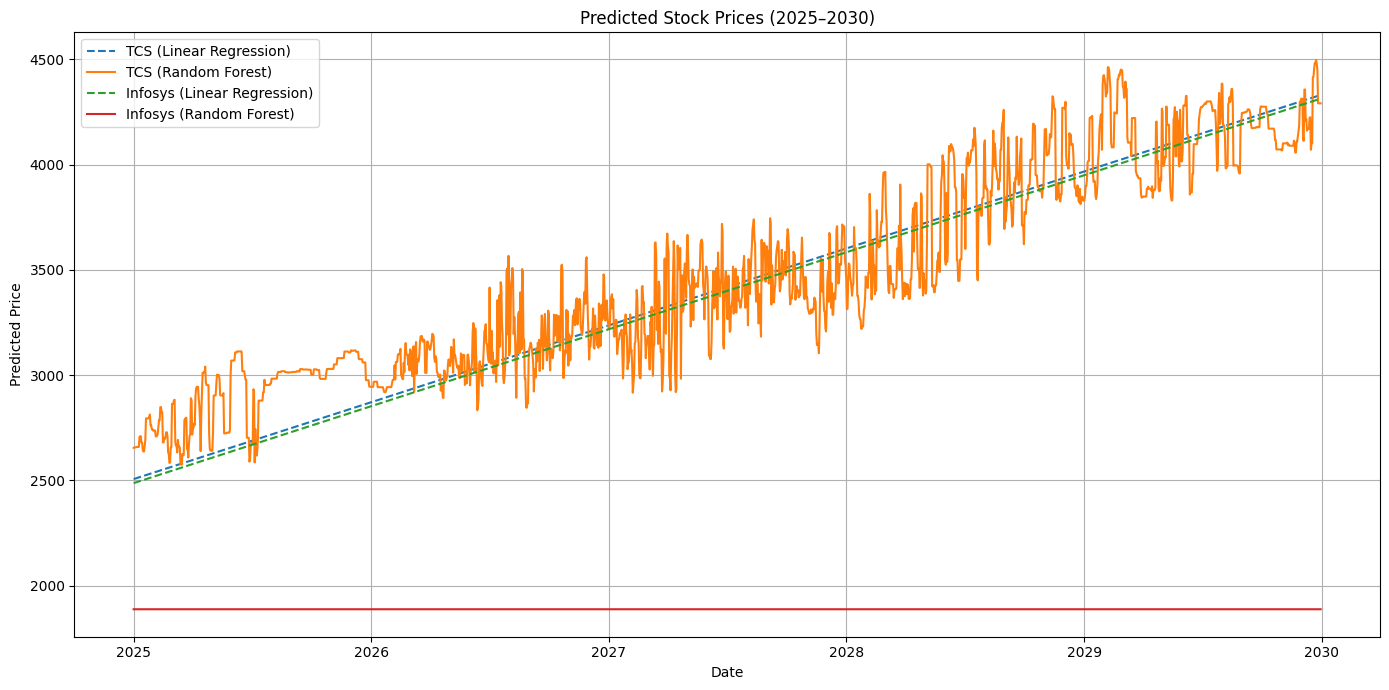

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(future_df.index, future_df['TCS_LR'], label='TCS (Linear Regression)', linestyle='--')
plt.plot(future_df.index, future_df['TCS_RF'], label='TCS (Random Forest)', linestyle='-')
plt.plot(future_df.index, future_df['Infosys_LR'], label='Infosys (Linear Regression)', linestyle='--')
plt.plot(future_df.index, future_df['Infosys_RF'], label='Infosys (Random Forest)', linestyle='-')

plt.title('Predicted Stock Prices (2025–2030)')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print("TCS (2030) - Linear Regression:", future_prices_tcs_lr[-1])
print("TCS (2030) - Random Forest    :", future_prices_tcs_rf[-1])
print("Infosys (2030) - Linear Regression:", future_prices_infosys_lr[-1])
print("Infosys (2030) - Random Forest    :", future_prices_infosys_rf[-1])

TCS (2030) - Linear Regression: 4330.667628649657
TCS (2030) - Random Forest    : 4291.168920898437
Infosys (2030) - Linear Regression: 4313.301054368406
Infosys (2030) - Random Forest    : 1888.2743054199218
